# Algorithm : Sliding Window

<h5>Description:</h5>
<ul>
<li>The Sliding Window Algorithm segments a time series by moving a window of fixed size along the series.</li>
<li>At each position of the window, a segment is formed using the data points within the window.</li>
<li>The window slides along the time series with a specified step size, creating overlapping segments.</li>
<li>The size and step of the window are user-defined parameters that determine the granularity of the segmentation.</li>
<li>This algorithm is useful for detecting short-term patterns or changes in the time series.</li>
<li>It can be combined with other algorithms, such as clustering or classification, to analyze the segments further.</li>
<li>The result is a set of segments that cover the entire time series, with each segment representing a subset of the data points.</li>
</ul>

<h3>Importing the necessary libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange, array, ones, vstack
from numpy.linalg import lstsq

<h3>Define Functions</h3>

In [2]:
def read_data_from_txt_file(file_path):
    try:
        with open(file_path, "r") as file:
            lines = file.readlines()
            data = [float(line.strip()) for line in lines if line.strip()]
        xs = np.arange(len(data))
        ys = np.array(data)
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None


def read_data_from_csv_file(file_path, target_name):
    try:
        df = pd.read_csv(file_path)
        xs = np.arange(len(df))
        ys = df[target_name].values
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

In [3]:
class Approximation:
    def linear_regression(self, subsequence, subseq_range):
        p, error = self.leastsquareslinefit(subsequence, subseq_range)

        # compute y = mx + c
        y0 = p[0] * subseq_range[0] + p[1]
        y1 = p[0] * subseq_range[1] + p[1]
        return (subseq_range[0], y0, subseq_range[1], y1)

    def leastsquareslinefit(self, subsequence, subseq_range):
        x = arange(subseq_range[0], subseq_range[1] + 1)
        y = array(subsequence[subseq_range[0] : subseq_range[1] + 1])

        A = vstack([x, ones(len(x))]).T
        (p, residuals, rank, s) = lstsq(A, y, -1)  # rcond=-1 for futurewarning
        try:
            error = residuals[0]
        except IndexError:
            error = 0.0
        return (p, error)

    def sumsquerred_error(self, subsequence, segment):
        x0, y0, x1, y1 = segment
        error = self.leastsquareslinefit(subsequence, (x0, x1))[1]
        return error

In [4]:
# Define functions for creating segments and calculating errors
def create_segment(approximation, subsequence, subseq_range):
    return approximation.linear_regression(subsequence, subseq_range)

def compute_error(approximation, subsequence, segment):
    return approximation.sumsquerred_error(subsequence, segment)

In [5]:
def sliding_window_segmentation(T, max_error, create_segment=create_segment, compute_error=compute_error):
    approximation = Approximation()
    N = len(T)
    anchor = 0
    seq_TS = []
    
    while anchor != N - 1:
        i = 1
        while (compute_error(approximation,T,(anchor, T[anchor], anchor + i, T[anchor + i - 1]),)< max_error):
            i += 1
            if anchor + i >= N:
                break
        segment = create_segment(approximation, T, (anchor, anchor + i - 1))
        seq_TS.append(segment)

        anchor = anchor + i - 1

    return seq_TS

<h3>Testing Algorithm on Weather Data</h3>

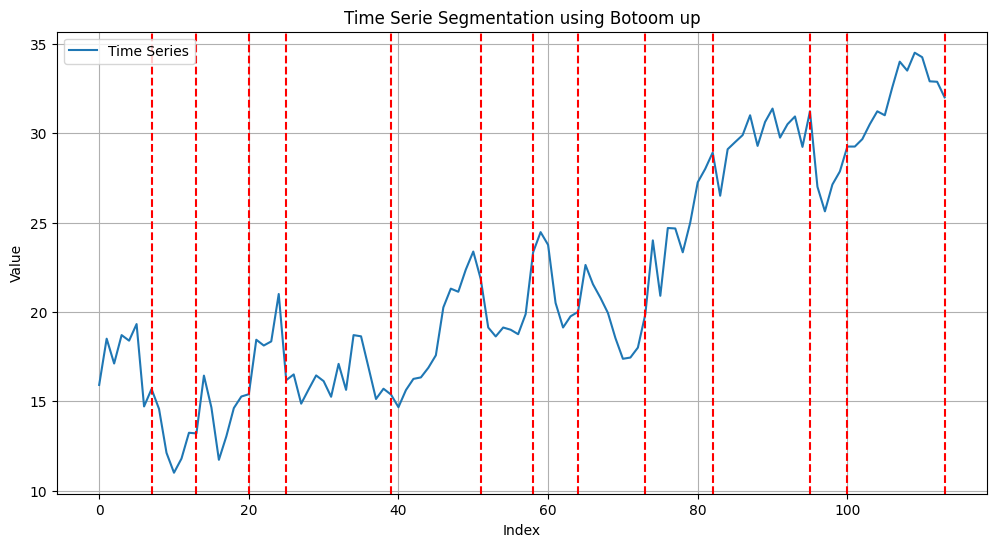

In [6]:
# Define your time series data
file_path = "../datasets/weather dataset/DailyDelhiClimateTest.csv"
X, T = read_data_from_csv_file(file_path, target_name="meantemp")

T = T[:300]
# Maximum error threshold
max_error = 20

# Perform segmentation using the sliding window approach
segments = sliding_window_segmentation(T, max_error)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(T, label="Time Series")

# Plot vertical lines at breakpoints
for segment in segments:
    plt.axvline(x=segment[2], color="red", linestyle="--")

plt.title("Time Serie Segmentation using Botoom up")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()